# sprint 深層学習スクラッチ 畳み込みニューラルネットワーク１

In [607]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## データセットの用意
検証には引き続きMNISTデータセットを使用します。1次元畳み込みでは全結合のニューラルネットワークと同様に平滑化されたものを入力します。

# 【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成
チャンネル数を1に限定した1次元畳み込み層のクラスSimpleConv1dを作成してください。基本構造は前のSprintで作成した全結合層のFCクラスと同じになります。なお、重みの初期化に関するクラスは必要に応じて作り変えてください。Xavierの初期値などを使う点は全結合層と同様です。


ここでは パディング は考えず、ストライド も1に固定します。また、複数のデータを同時に処理することも考えなくて良く、バッチサイズは1のみに対応してください。この部分の拡張はアドバンス課題とします。

In [404]:
class conv1D_1CH:
    """
    チャネル１、スライド１、パディングなし、バッチサイズ１
    """
    
    def __init(self):
        self.x = None
        self.w = None
        self.b = None
        
    def forward(self, x, w, b):
        # backward用に確保
        self.x = x
        self.w = w
        self.b = b
        # forward計算
        delta = self.x.shape[0] -self.w.shape[0]
        a = np.zeros(delta+1)
        for n in range(delta+1):
            a[n] = (self.x[n:self.w.shape[0]+n]*self.w).sum() + self.b
        return a
    
    def backward(self, delta_a):
        # delta_b
        delta_b = np.array([delta_a.sum()])
        # delta_w
        delta_w = np.empty(self.w.shape[0])
        for n in range(self.w.shape[0]):
            delta_w[n] = delta_a.dot(self.x[n:n+delta_a.shape[0]])
        # delta_x
        delta_x = np.pad(self.w, [0,1], 'constant')*delta_a[0] + np.pad(self.w, [1,0], 'constant')*delta_a[1] 
        return delta_b, delta_w, delta_x

In [478]:
# 問題３についてclassを使用して畳み込み計算
conv1_ch = conv1D_1CH()
print("a : ", conv1_ch.forward(x, w, b))
print("delta_b, delta_w, delta_x : ", conv1_ch.backward(delta_a))

a :  [35. 50.]
delta_b, delta_w, delta_x :  (array([30]), array([ 50.,  80., 110.]), array([ 30, 110, 170, 140]))


# 【問題2】1次元畳み込み後の出力サイズの計算
畳み込みを行うと特徴量の数が変化します。どのように変化するかは以下の数式から求められます。パディングやストライドも含めています。この計算を行う関数を作成してください。

In [1213]:
def get_outsize(n_in, P, F, S):
    n_out = (n_in + 2*P - F)/S + 1
    if n_out!=int(n_out):
        # n_outが割り切れない場合、強制終了
        print("出力サイズが割り切れません。パディングとストライドを再設定して下さい。")
        return
    return int(n_out)

In [1072]:
# 問題３について出力サイズ計算
get_outsize(4, 0, 3, 1)

2

# 【問題3】小さな配列での1次元畳み込み層の実験
次に示す小さな配列でフォワードプロパゲーションとバックプロパゲーションが正しく行えているか確認してください。

In [379]:
# 入力x、重みw、バイアスb
x = np.array([1,2,3,4])
w = np.array([3, 5, 7])
b = np.array([1])

In [380]:
# 出力（答え）
# a = np.array([35, 50])

# 畳み込み計算
a = np.array([(x[:3]*w).sum()+1, (x[1:]*w).sum()+1])
print("a", a)

a [35 50]


In [381]:
# 誤差
delta_a = np.array([10, 20])

In [382]:
# バックプロパゲーション（答え）
# delta_b = np.array([30])
# delta_w = np.array([50, 80, 110])
# delta_x = np.array([30, 110, 170, 140])

# バックプロパゲーション計算
delta_b = np.array([delta_a[0]+delta_a[1]])
delta_w = np.array([delta_a[0]*x[0]+delta_a[1]*x[1],
                   delta_a[0]*x[1]+delta_a[1]*x[2],
                   delta_a[0]*x[2]+delta_a[1]*x[3]])
delta_x = np.array([delta_a[0]*w[0],
                    delta_a[0]*w[1]+delta_a[1]*w[0],
                    delta_a[0]*w[2]+delta_a[1]*w[1],
                    delta_a[1]*w[2]])
print("delta_b", delta_b)
print("delta_w", delta_w)
print("delta_x", delta_x)

delta_b [30]
delta_w [ 50  80 110]
delta_x [ 30 110 170 140]


# 【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成
チャンネル数を1に限定しない1次元畳み込み層のクラスConv1dを作成してください。

# 【問題5】（アドバンス課題）パディングの実装
畳み込み層にパディングの機能を加えてください。1次元配列の場合、前後にn個特徴量を増やせるようにしてください。


最も単純なパディングは全て0で埋める ゼロパディング であり、CNNでは一般的です。他に端の値を繰り返す方法などもあります。

# 【問題6】（アドバンス課題）ミニバッチへの対応
ここまでの課題はバッチサイズ1で良いとしてきました。しかし、実際は全結合層同様にミニバッチ学習が行われます。Conv1dクラスを複数のデータが同時に計算できるように変更してください。

# 【問題7】（アドバンス課題）任意のストライド数
ストライドは1限定の実装をしてきましたが、任意のストライド数に対応できるようにしてください。

In [1214]:
class conv1D_try:
    """
    チャネル複数、ストライド複数、パディング複数、バッチサイズ複数
    input_shape：（バッチ数、channel数、特徴量数）
    """
    
    def __init(self):
        self.x = None
        self.w = None
        self.b = None
        self.n_out = None
        self.P = None
        self.S = None
    
    def forward(self, x, w, b, P=0, S=1, input_shape=(None, None, None)):
        # input_shaepを統一する    
        if x.shape!=input_shape:
            x = x.reshape(*input_shape)
        # backward用に確保
        self.x = x
        self.w = w
        self.b = b
        self.P = P
        self.S = S
        # forward計算
        # 出力の初期設定(n_outが割り切れない場合、強制終了になるよう関数get_outsizeを設定)
        self.n_out = get_outsize(self.x.shape[-1], self.P, self.w.shape[-1], self.S)
        a = np.zeros([self.x.shape[0], self.w.shape[0], self.n_out])
        # パディングに合わせてxを変換
        self.x = np.pad(self.x, [(0,0), (0, 0), (self.P, self.P)], 'constant')
        # tensordotによるテンソル積(チャネルファーストに合わせたインデックス)
        x_index = [i for i in range(self.x.ndim)]
        w_index = [i for i in range(self.w.ndim)]
        # バッチに対してブロードキャスト
        # ストライドに合わせる
        for col in range(self.n_out):
            a[:, :, col] = np.tensordot(self.x[:, :, col*self.S:self.w.shape[2]+col*self.S],
                                            self.w, axes=(x_index[1:], w_index[1:])) + self.b
        return a
    
    def backward(self, delta_a):
        # input_shaepを統一する    
        if delta_a.shape!=(self.x.shape[0], delta_a.shape[-2], delta_a.shape[-1]):
            delta_a = delta_a.reshape(self.x.shape[0], delta_a.shape[-2], delta_a.shape[-1])
        # delta_b
        delta_b = delta_a.sum(axis=(0, -1))
        # delta_w
        # バッチに対してブロードキャスト
        # ストライドに合わせる
        delta_w = np.zeros_like(self.w)
        for channel in range(delta_a.shape[1]):
            for col in range(delta_a.shape[-1]):
                delta_w[channel, :, :] += (self.x[:, :, col*self.S:col*self.S+delta_w.shape[2]]
                                                        *delta_a[:, channel:channel+1, col:col+1]).sum(axis=0)
        # delta_x
        # バッチに対してブロードキャスト
        # ストライドに合わせる
        delta_x = np.zeros_like(self.x)
        for col in range(delta_a.shape[-1]):
            delta_x[:, :, :] += (np.pad(self.w, [(0,0), (0, 0), (col*self.S, (delta_a.shape[-1]-1-col)*self.S)], 'constant')
                                             * delta_a[:, :, col].reshape(delta_a.shape[0], -1, 1, 1)).sum(axis=1)
        # パディングの分を削除
        if self.P>0:
            delta_x = delta_x[:, :, self.P:-self.P]
        return delta_b, delta_w, delta_x

In [1215]:
# 確認用データ１
x_s = np.array([[1, 2, 3, 4], [2, 3, 4, 5]]) # shape(2, 4)で、（入力チャンネル数、特徴量数）である。
w_s = np.ones((3, 2, 3)) # 例の簡略化のため全て1とする。(出力チャンネル数、入力チャンネル数、フィルタサイズ)である。
b_s = np.array([1, 2, 3]) # （出力チャンネル数）

# フォワードの出力 (答え1)
# a = np.array([[16, 22], [17, 23], [18, 24]]) # shape(3, 2)で、（出力チャンネル数、特徴量数）である。
conv1d = conv1D_try()
print("a : ", conv1d.forward(x_s, w_s, b_s, P=0, S=1, input_shape=(1, 2, 4)))
# print("delta_b, delta_w, delta_x : ", conv1_CHs.backward(delta_a))

a :  [[[16. 22.]
  [17. 23.]
  [18. 24.]]]


In [1216]:
# 確認用データ２
x_s2 = np.array([[1,2,3,4],
               [2,3,4,5]])
w_s2 = np.array([[[1,1,2],[2,1,1]],
              [[2,1,1],[1,1,1]],
              [[1,1,1],[1,1,1]]])
b_s2 = np.array([1,2,3])
loss_s2 = np.array([[9,11],
                [32,35],
                [52,56]])

# フォワードの出力 (答え2)
# out_s2= np.array([[21,29],
#                 [18,25],
#                 [18,24]])
conv1d_2 = conv1D_try()
out = conv1d_2.forward(x_s2, w_s2, b_s2, P=0, S=1, input_shape=(1, 2, 4))
print("フォーワードout \n", out)

# バックワードの勾配 (答え)
# x_delta = np.array([[125,230,204,113],
#                     [102,206,195,102]])

# w_delta = np.array([[[31,51,71],[51,71,91]],
#                     [[102,169,236],[169,236,303]],
#                     [[164,272,380],[272,380,488]]])
print("\ndelta_b", conv1d_2.backward(loss_s2)[0])
print("delta_w\n ", conv1d_2.backward(loss_s2)[1])
print("delta_x\n ", conv1d_2.backward(loss_s2)[2])

フォーワードout 
 [[[21. 29.]
  [18. 25.]
  [18. 24.]]]

delta_b [ 20  67 108]
delta_w
  [[[ 31  51  71]
  [ 51  71  91]]

 [[102 169 236]
  [169 236 303]]

 [[164 272 380]
  [272 380 488]]]
delta_x
  [[[125 230 204 113]
  [102 206 195 102]]]


In [1217]:
# 確認用データ3(パディング、ストライド有)
x_s3 = np.array([[[1,2,3,4],[2,3,4,5]],
                 [[1,2,3,4],[2,3,4,5]]])
w_s3 = np.array([[[1,1,2],[2,1,1]],
              [[2,1,1],[1,1,1]],
              [[1,1,1],[1,1,1]]])
b_s3 = np.array([1,2,3])
loss_s3 = np.array([[[9,11],[32,35],[52,56]],
                   [[9,11],[32,35],[52,56]]])

# フォワードの出力 (答え2)
# out_s2= np.array([[21,29],
#                 [18,25],
#                 [18,24]])
conv1d_3 = conv1D_try()
out = conv1d_3.forward(x_s3, w_s3, b_s3, P=1, S=3, input_shape=(2, 2, 4))
print("フォーワードout \n", out)

# バックワードの勾配 (答え)
# x_delta = np.array([[125,230,204,113],
#                     [102,206,195,102]])

# w_delta = np.array([[[31,51,71],[51,71,91]],
#                     [[102,169,236],[169,236,303]],
#                     [[164,272,380],[272,380,488]]])
print("\ndelta_b", conv1d_3.backward(loss_s3)[0])
print("delta_w\n ", conv1d_3.backward(loss_s3)[1])
print("delta_x\n ", conv1d_3.backward(loss_s3)[2])

フォーワードout 
 [[[11. 21.]
  [10. 21.]
  [11. 19.]]

 [[11. 21.]
  [10. 21.]
  [11. 19.]]]

delta_b [ 40 134 216]
delta_w
  [[[ 66 106  36]
  [ 88 146  54]]

 [[210 344 128]
  [280 478 192]]

 [[336 552 208]
  [448 768 312]]]
delta_x
  [[[ 93 102 137 102]
  [ 93  93 113 102]]

 [[ 93 102 137 102]
  [ 93  93 113 102]]]


# 【問題8】学習と推定
これまで使ってきたニューラルネットワークの全結合層の一部をConv1dに置き換えてMNISTを学習・推定し、Accuracyを計算してください。


出力層だけは全結合層をそのまま使ってください。ただし、チャンネルが複数ある状態では全結合層への入力は行えません。その段階でのチャンネルは1になるようにするか、 平滑化 を行なってください。

In [1218]:
class conv1D:
    """
    チャネル複数、ストライド複数、パディング複数、バッチサイズ複数
    
    下記をコンストラクタに加える
    input_shape：（バッチ数、channel数、特徴量数）
    w_shape : (出力チャネル、入力チャネル、フィルタサイズ)
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, input_shape, w_shape, P, S):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.initializer = initializer
        self.W = self.initializer.W(*w_shape)    # (出力チャンネル数、入力チャンネル数、フィルタサイズ)
        self.B = self.initializer.B(w_shape[0])    # (出力チャンネル数)
        # 初期値
        self.Z = None
        #  AdaGrad用の変数
        self.H_B = 0
        self.H_W = 0
        # conv初期値
        self.input_shape = input_shape
        self.w_shape = w_shape
        self.P = P
        self.S = S
        self.n_out = n_nodes2//w_shape[0]
        
    
    def forward(self, Z):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        # input_shaepを統一する
        if Z.shape!=self.input_shape:
            # 予測時はバッチサイズが異なるため１次元目は「−１」
            Z = Z.reshape(-1, *self.input_shape[1:])
        # backward用に確保
        self.Z = Z
        # forward計算        
        # 出力の初期設定
        A = np.zeros([self.Z.shape[0], self.W.shape[0], self.n_out])
        # パディングに合わせてxを変換
        self.Z = np.pad(self.Z, [(0,0), (0, 0), (self.P, self.P)], 'constant')
        # tensordotによるテンソル積(チャネルファーストに合わせたインデックス)
        Z_index = [i for i in range(self.Z.ndim)]
        W_index = [i for i in range(self.W.ndim)]     
        # バッチに対してブロードキャスト
        # ストライドに合わせる
        for col in range(self.n_out):
            A[:, :, col] = np.tensordot(self.Z[:, :, col*self.S:self.W.shape[2]+col*self.S],
                                                  self.W, axes=(Z_index[1:], W_index[1:])) + self.B
        return A
    
    
    def backward(self, dA):
        # input_shaepを統一する    
        if dA.shape!=(self.Z.shape[0], self.W.shape[0], self.n_out):
            dA = dA.reshape(self.Z.shape[0], self.W.shape[0], self.n_out)
        # backwardの計算
        # dB
        dB = dA.sum(axis=(0, -1))
        # dW
        # バッチに対してブロードキャスト(dAのチャネル次元を残すように設計)
        dW = np.zeros_like(self.W)
        for channel in range(dA.shape[1]):
            for col in range(dA.shape[-1]):
                dW[channel, :, :] += (self.Z[:, :, col*self.S:col*self.S+dW.shape[-1]]
                                               *dA[:, channel:channel+1, col:col+1]).sum(axis=0)
        # dZ
        # バッチに対してブロードキャスト
        # ストライドに合わせる
        dZ = np.zeros_like(self.Z)
        for col in range(dA.shape[-1]):
            dZ[:, :, :] += (np.pad(self.W, [(0,0), (0, 0), (col*self.S, (dA.shape[-1]-1-col)*self.S)], 'constant')
                               *dA[:, :, col].reshape(dA.shape[0], -1, 1, 1)).sum(axis=1)
        # パディングの分を削除
        if self.P>0:
            dZ = dZ[:, :, self.P:-self.P]
        
        #  AdaGrad用の計算
        size = dA.shape[0]
        self.H_B += (dB/size)**2
        self.H_W += (dW/size)**2
        # 更新(AdaGrad用に引数を設定)
        self.B, self.W = self.optimizer.update(self.B, self.W, dB, dW, self.H_B, self.H_W, size)

        return dZ

In [1210]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
        
    def __len__(self):
        return self._stop
    
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    
    def __iter__(self):
        self._counter = 0
        return self
    
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [1220]:
class ScratchDeepNeuralNetrowkClassifier():
    """
    DNNスクラッチ
    Parameters
    ----------
    epoch_count : int
      エポック回数
    layer_act : dic
      layerとact名
    n_nodes : タプル int
      各FCノードの数
    lr : int
      学習率
    activation : obj
      活性化手法のインスタンス
    layer_type : obj
      層のインスタンス
    initializer : obj
      初期化方法のインスタンス
    optimizer : obj
      最適化手法のインスタンス
    sigma : float
      標準偏差、SimpleInitializerのみ入力
    layer_dic : dic
      key : layer名、value : 層のインスタンス
    act_dic : dic
      key : activation名、value : activationのインスタンス
    train_loss : list
      trainのエポック毎のcross_entropyを格納するリスト(エポック毎の平均値)
    val_loss : list
      valのエポック毎のcross_entropyを格納するリスト(全データ分を計算)
    n_features : int
      特徴量の数
    n_output : int
      出力層のノード数
    """
    def __init__(self, epoch_count, layer_act, n_nodes, lr, layer_type,
                      activation,initializer, optimizer, conv_info, sigma=None):
        self.epoch_count = epoch_count
        self.n_nodes = n_nodes
        self.lr = lr
        self.sigma = sigma
        self.layer_type = layer_type
        self.activation = activation
        self.initializer = initializer
        self.optimizer = optimizer
        self.conv_info = conv_info
        self.layer_dic = {}
        self.act_dic = {}
        self.train_loss = []
        self.val_loss = []
        
    def fit(self, X, y, X_val=None, y_val=None):
        # conv1dのoutsizeを取得(size * channel)
        # outsizeが割り切れない場合、強制終了になるよう関数get_outsizeを設定
        conv_outsize = get_outsize(self.conv_info["in_size"], self.conv_info["P"],
                                                 self.conv_info["w_size"], self.conv_info["S"])*self.conv_info["out_ch"]
        # 初期化
        ini_sigma = self.sigma
        n_features = X.shape[1]
        n_output = y.shape[1]
        # 特徴量の数、各ノード数、出力ノード数を結合
        self.n_nodes = list(self.n_nodes)
        self.n_nodes.insert(0, conv_outsize)
        self.n_nodes.insert(0, n_features)
        self.n_nodes.append(n_output)
        # 層の数だけインスタンス化、リストに追加
        num = 0
        nodes_num = len(self.n_nodes) - 1
        for layer, act in layer_act.items():
            # インスタンス時にsigma設定しない場合(AdaGrad)、前のノード数を代入する
            self.sigma = self.n_nodes[num] if ini_sigma is None else ini_sigma
            
            # 最初の層をconv1Dでインスタンス化
            if num == 0:
                # インプット、フィルターのshape設定
                input_shape = (self.conv_info["in_batch"], self.conv_info["in_ch"], self.conv_info["in_size"])
                w_shape = (self.conv_info["out_ch"], self.conv_info["in_ch"], self.conv_info["w_size"])
                # インスタンス化(インプット、フィルター情報もコンストラクタに加える)
                self.layer_dic[layer] = conv1D(self.n_nodes[num], self.n_nodes[num+1], self.initializer(self.sigma),
                                                             self.optimizer(self.lr), input_shape=input_shape, w_shape=w_shape,
                                                             P=self.conv_info["P"], S=self.conv_info["S"])
            # その他の層をインスタンス化
            else:
                self.layer_dic[layer] = self.layer_type(self.n_nodes[num], self.n_nodes[num+1],
                                                                       self.initializer(self.sigma), self.optimizer(self.lr))
        
            # 出力時のみactはSoftmax
            if num+1 == nodes_num:
                self.act_dic[act] = Softmax()
            else:
                self.act_dic[act] = self.activation()
            num += 1
            
        # ミニバッチのインスタンス
        get_mini_batch = GetMiniBatch(X, y, batch_size=20)
        
        # エポック回数繰り返し
        for epoch in range(self.epoch_count):
            # イテレーション回数の初期化
            iter_count = 1
            # イテレーション毎のloss(cross_entropy)記録用array初期化
            train_loss = np.zeros(len(get_mini_batch))
            # イテレーション回数繰り返し
            for mini_X, mini_y in get_mini_batch:
                # 回数の表示
                if iter_count%2400 == 0:
                    print("エポック{}".format(epoch+1))
                    print("{}回目の学習".format(iter_count))
                # 層の数だけforward
                # 処理回数の初期化
                num = 0
                for layer, act in zip(self.layer_dic.values(), self.act_dic.values()):
                    if num==0:
                        Z = mini_X
                    
                    # 最初の層をconv1D、reshapeしてフラット化したのを出力
                    if num==0:
                        A = layer.forward(Z).reshape(mini_X.shape[0], -1)
                    else:
                        A = layer.forward(Z)
                    Z = act.forward(A)
                    num += 1
                   
                # 層の数だけbackward(降順)
                # 逆順用の辞書を作成
                layer_dic_re = {}
                act_dic_re = {}
                for key, item in sorted(self.layer_dic.items(), reverse=True):
                    layer_dic_re[key] = item
                for key, item in sorted(self.act_dic.items(), reverse=True):
                    act_dic_re[key] = item
                # 処理回数の初期化   
                num = 0
                for layer, act in zip(layer_dic_re.values(), act_dic_re.values()):
                    if num==0:
                        # 交差エントロピー誤差とソフトマックスを合わせている
                        dA, train_L = act.backward(mini_y)
                    else:
                        dA = act.backward(dZ)
                    dZ = layer.backward(dA)
                    num += 1   
                # イテレーション毎のloss(cross_entropy)記録
                train_loss[iter_count-1] = train_L
                # イテレーション回数のカウント
                iter_count += 1
             
            # valのlossを計算
            # valのforward
            num = 0
            for layer, act in zip(self.layer_dic.values(), self.act_dic.values()):
                if num==0:
                    Z = X_val

                # 最初の層をconv1D、reshapeしてフラット化したのを出力
                if num==0:
                    A = layer.forward(Z).reshape(X_val.shape[0], -1)
                else:
                    A = layer.forward(Z)
                Z = act.forward(A)
               
                # valのcross_entropy計算
                if num+1 == nodes_num:
                    dA, val_L = act.backward(y_val)
                num += 1
            # loss(cross_entropy)記録
            self.train_loss.append(train_loss.mean())
            self.val_loss.append(val_L)
        
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        num = 0
        for layer, act in zip(self.layer_dic.values(), self.act_dic.values()):
            if num==0:
                Z = X      
            # 最初の層をconv1D、reshapeしてフラット化したのを出力
            if num==0:
                A = layer.forward(Z).reshape(X.shape[0], -1)
            else:
                A = layer.forward(Z)
            Z = act.forward(A)
            num += 1
        
        return Z.argmax(axis=1)

In [1221]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.initializer = initializer
        self.W = self.initializer.W(n_nodes1, n_nodes2)
        self.B = self.initializer.B(n_nodes2)
        # 初期値
        self.Z = None
        #  AdaGrad用の変数
        self.H_B = 0
        self.H_W = 0
            
    def forward(self, Z):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        # backward用に保持
        self.Z = Z
        # forwardの計算
        Z = np.concatenate([np.ones([self.Z.shape[0], 1]), self.Z], axis=1)
        W_baias = np.concatenate([self.B.reshape(1, -1), self.W], axis=0)
        A = Z.dot(W_baias)
        
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # backwardの計算
        dB = dA.sum(axis=0)
        dW = self.Z.T.dot(dA)
        dZ = dA.dot(self.W.T)
        
        #  AdaGrad用の計算
        size = dA.shape[0]
        self.H_B += (dB/size)**2
        self.H_W += (dW/size)**2
        
        # 更新(AdaGrad用に引数を設定)
        self.B, self.W = self.optimizer.update(self.B, self.W, dB, dW, self.H_B, self.H_W, size)
        
        return dZ

In [1222]:
class Tanh:
    
    def __init__(self):
        self.A = None
    
    def forward(self, A):
        # backward用に保持
        self.A = A
        # forward計算
        Z = np.tanh(A)
        return Z
    
    def backward(self, dZ):
        dA = dZ * (1 - (np.tanh(self.A))**2)
        return dA

In [1223]:
class Softmax:
    
    def __init__(self):
        self.Z = None
    
    def forward(self, A):
        # forward計算
        Z = np.exp(A)/(np.exp(A).sum(axis=1).reshape([-1, 1]))
        # backward用に保持
        self.Z = Z
        return Z
        
    def backward(self, y):
        # backward
        dA = self.Z - y
        # cross_entropy
        L = -(y*np.log(self.Z)).sum()/y.shape[0]
        return dA, L

In [1224]:
class Xavier:
    """
    Xavierの初期化
    Parameters
    ----------
    sigma : float
      Xavierの標準偏差
    
    FCの場合
    n_nodes1 : int
      入力ノード数
    n_nodes2 : int
      出力ノード数
      
    conv1Dの場合
    n_nodes1 : int
      出力チャンネル数
    n_nodes2 : int
      入力チャンネル数
    n_size : int
      フィルタサイズ
      
    """
    def __init__(self, n_nodes1):
        # ScratchDeepNeuralNetrowkClassifierでは変数名sigmaとしてn_nodes1を受け取っている
        self.sigma = np.sqrt(1/n_nodes1)
    def W(self, n_nodes1, n_nodes2, n_size=None):
        """
        重みの初期化
        Parameters
        ----------
        n_nodes1 : int
          前の層のノード数
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        W :
        """
        np.random.seed(seed=0)
        if n_size:
            W = self.sigma * np.random.randn(n_nodes1, n_nodes2, n_size)
        else:
            W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
          後の層のノード数

        Returns
        ----------
        B :
        """
        np.random.seed(seed=1)
        # １次元で出力
        B = self.sigma * np.random.randn(n_nodes2)
        return B

In [1225]:
class AdaGrad:
    """
    AdaGrad
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
    def update(self, B, W, dB, dW, H_B, H_W, size=None):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        """         
        B -= self.lr*dB/size/(np.sqrt(H_B) + 1E-1)
        W -= self.lr*dW/size/(np.sqrt(H_W) + 1E-1)
        
        return B, W

In [1226]:
# データロード
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# 正規化
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255

#分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# one_hot化
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.fit_transform(y_val[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])

In [1228]:
# 1層目がconv1D　パディング無、ストライド無
# エポック５
# 入力バッチ数、入力チャネル、入力サイズ、出力チャネル、フィルターサイズ、パディング、スライド
conv_info = {"in_batch":20, "in_ch":1, "in_size":784, "out_ch":2, "w_size":2, "P":0, "S":1}

# FC層のノード数
n_nodes = ()

# 層構成
layer_act = {"CONV1D":"ACT1", "FC2":"ACT2"}

# Tanh, Xavier, AdaGrad
conv1d = ScratchDeepNeuralNetrowkClassifier(epoch_count=5, layer_act=layer_act, n_nodes=n_nodes, lr=0.01,
                                               layer_type=FC, activation=Tanh, initializer=Xavier, optimizer=AdaGrad, sigma=None,
                                               conv_info=conv_info)
conv1d.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)

エポック1
2400回目の学習
エポック2
2400回目の学習
エポック3
2400回目の学習
エポック4
2400回目の学習
エポック5
2400回目の学習


正解率：0.9134166666666667


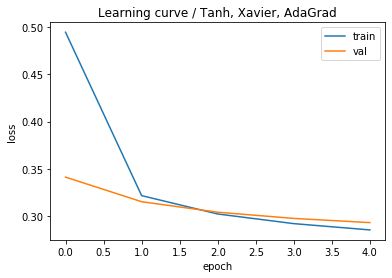

In [1229]:
# 1層目がconv1D　パディング無、ストライド無
# エポック５
# 推定　→　Accuracy
y_pred = conv1d.predict(X_val)
print("正解率：{}".format(accuracy_score(y_val, y_pred)))
# 学習曲線
plt.plot(conv1d.train_loss, label='train')
plt.plot(conv1d.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning curve / Tanh, Xavier, AdaGrad')
plt.legend()
plt.show()

In [1230]:
# 1層目がconv1D、パディングあり、ストライドあり
# エポック１０
# 入力バッチ数、入力チャネル、入力サイズ、出力チャネル、フィルターサイズ、パディング、スライド
conv_info = {"in_batch":20, "in_ch":1, "in_size":784, "out_ch":2, "w_size":2, "P":3, "S":2}

# FC層のノード数
n_nodes = ()

# 層構成
layer_act = {"CONV1D":"ACT1", "FC2":"ACT2"}

# Tanh, Xavier, AdaGrad
conv1d_PS = ScratchDeepNeuralNetrowkClassifier(epoch_count=10, layer_act=layer_act, n_nodes=n_nodes, lr=0.01,
                                               layer_type=FC, activation=Tanh, initializer=Xavier, optimizer=AdaGrad, sigma=None,
                                               conv_info=conv_info)
conv1d_PS.fit(X_train, y_train_one_hot, X_val, y_val_one_hot)

エポック1
2400回目の学習
エポック2
2400回目の学習
エポック3
2400回目の学習
エポック4
2400回目の学習
エポック5
2400回目の学習
エポック6
2400回目の学習
エポック7
2400回目の学習
エポック8
2400回目の学習
エポック9
2400回目の学習
エポック10
2400回目の学習


正解率：0.912


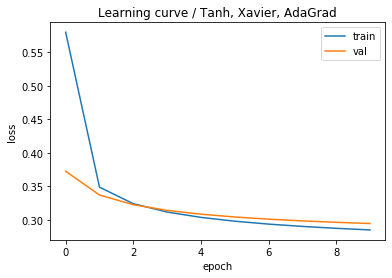

In [1231]:
# 1層目がconv1D　パディングあり、ストライドあり
# エポック１０
# 推定　→　Accuracy
y_pred = conv1d_PS.predict(X_val)
print("正解率：{}".format(accuracy_score(y_val, y_pred)))
# 学習曲線
plt.plot(conv1d_PS.train_loss, label='train')
plt.plot(conv1d_PS.val_loss, label='val')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Learning curve / Tanh, Xavier, AdaGrad')
plt.legend()
plt.show()

# ボツコード
* バッチに対してブロードキャストしていない
* ストライド、パティングに対応していない

In [1019]:
class conv1D_before:
    """
    チャネル複数、ストライド1、パディング0、バッチサイズ複数
    input_shape：（バッチ数、channel数、特徴量数）
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer, input_shape, w_shape, P, S):
        self.optimizer = optimizer
        # 初期化
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.initializer = initializer
        self.W = self.initializer.W(*w_shape)    # (出力チャンネル数、入力チャンネル数、フィルタサイズ)
        self.B = self.initializer.B(w_shape[0])    # (出力チャンネル数)
        # 初期値
        self.Z = None
        #  AdaGrad用の変数
        self.H_B = 0
        self.H_W = 0
        # conv初期値
        self.input_shape = input_shape
        self.w_shape = w_shape
        self.P = P
        self.S = S
        self.n_out = n_nodes2//w_shape[0]
        
    
    def forward(self, Z):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """ 
        # input_shaepを統一する
        if Z.shape!=self.input_shape:
            Z = Z.reshape(-1, *self.input_shape[1:])
        # backward用に確保
        self.Z = Z
        # forward計算
        # 出力の初期設定
        A = np.zeros([self.Z.shape[0], self.W.shape[0], self.n_out])
        # tensordotによるテンソル積(チャネルファーストに合わせたインデックス)
        Z_index = [i for i in range(self.Z.ndim)]
        W_index = [i for i in range(self.W.ndim)]
        for batch in range(A.shape[0]):
            for col in range(self.n_out):
                A[batch, :, col] = np.tensordot(self.Z[batch, :, col:self.W.shape[2]+col],
                                                self.W, axes=(Z_index[:-1], W_index[1:])) + self.B
                
        print("self.Z", self.Z)
        print("self.B", self.B)
        print("self.W", self.W)
        print("A", A)        
        
        return A
    
    
    def backward(self, dA):
        # input_shaepを統一する    
        if dA.shape!=(self.Z.shape[0], self.W.shape[0], self.n_out):
            dA = dA.reshape(self.Z.shape[0], self.W.shape[0], self.n_out)
        # backwardの計算
        # dB
        dB = dA.sum(axis=(0, -1))
        # dW
        dW = np.zeros_like(self.W)
        for batch in range(dA.shape[0]):
            for channel in range(dA.shape[1]):
                for col in range(dW.shape[2]):
                    dW[channel, :, col] += (self.Z[batch, :, col:col+self.n_out]*dA[batch, channel, :]).sum(axis=-1)    
        # dZ
        dZ = np.zeros_like(self.Z)
        for batch in range(dA.shape[0]):
            for col in range(dA.shape[-1]):
                dZ[batch, :, :] += (np.pad(self.W, [(0,0), (0, 0), (col, dA.shape[-1]-col-1)], 'constant')
                                                 * dA[batch, :, col].reshape(-1, 1, 1)).sum(axis=0)
        
        #  AdaGrad用の計算
        size = dA.shape[0]
        self.H_B += (dB/size)**2
        self.H_W += (dW/size)**2
        # 更新(AdaGrad用に引数を設定)
        self.B, self.W = self.optimizer.update(self.B, self.W, dB, dW, self.H_B, self.H_W, size)
        
        
        print("dA", dA)
        print("dB", dB)
        print("dW", dW)
        print("dZ", dZ)
        print("self.H_B", self.H_B)
        print("self.H_W", self.H_W)

        return dZ